구글 코랩에서 한글 문제 해결
- 아래 코드 설치를 한다.
- 코랩 런타임 -> 런타임 다시 시작한다

다시 임포트 하는 과정이 필요한듯

In [37]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following package was automatically installed and is no longer required:
  libnvidia-common-510
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-san

In [1]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/colab/dataanalysis

Mounted at /content/drive
/content/drive/MyDrive/colab/dataanalysis


### import

In [2]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

import pandas as pd

from tqdm.notebook import tqdm
import re

### Naver 영화 - 평점순 영화별 제목, Review, 장르 Crawling
https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&tg=0&date=20230219   

읽어올 데이터의 진행율을 볼때 tqdm_notebook을 사용  

In [3]:
story = []
title = []
genre = []

# 데이터가 많으면 진행률을 보여주는게 나음
#                         범위는 나중에 변경해도 된다.
for i in tqdm(range(1,2)) :
  url = 'https://movie.naver.com/movie/sdb/rank/rmovie.naver?sel=pnt&tg=0&date=20230219&page=' + str(i)
  html = urlopen(url)
  soup = BeautifulSoup(html, 'html.parser')
  # print(soup)
  # print(type(soup))
  # break
 
 #                              클래스일때 언더바 사용하기
  titles = soup.find_all('div', class_='tit5') # attrs={'class':'tit5'}
  href = []

  try:
    for each in titles :
      href.append(each.find('a')['href'])
    #print(href)

    for j in tqdm(range(len(href))): # 사이트에 들어가서 쭉 긁어 올 것
      domain = 'https://movie.naver.com/'
      domain += href[j]
      # print(domain)
      html = urlopen(domain)
      soup = BeautifulSoup(html,'html.parser')
      genre_list = soup.select('dl.info_spec >  dt.step1 + dd > p > span:nth-of-type(1) > a') # 셀륵트는 여러개를 가지고 올 수 있다.
      genre_text = []
      # print('genre_list:', len(genre_list))
      for k in range(len(genre_list)) :
        #print(genre_list[k].get_text())
        genre_text.append(genre_list[k].get_text())
      genre.append(genre_text)
    # print('genre:' + genre)

      # print(genre)

      title.append(soup.select_one('h3.h_movie > a').get_text())
      # print(title)

      story.append(soup.find('p', class_='con_tx').get_text())
      # print(story)

  except:
    pass

print(genre)
print(title)
print(story)


# 줄거리 정규화 처리
for i in range(len(story)) :
    story[i] = re.sub( '[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》“”’{}]', '', story[ i ] )
    # select_one()와 select() 로 텍스트를 가져오면 <br>은 '\r'로, 공백(&nbsp;)은 '\xa0'로 가져온다.
    story[i] = re.sub( '\r\xa0', ' ', story[ i ] ) # re.sub( '\r\xa0', '.', story[ i ] ) 으로 수정해도 된다.
    
    print(story[i])


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

[['액션'], ['애니메이션', '코미디', '가족'], ['드라마'], ['드라마'], ['공연실황', '다큐멘터리'], ['다큐멘터리', '드라마'], ['다큐멘터리'], ['모험', '코미디', '드라마'], ['드라마'], ['드라마', '전쟁'], ['애니메이션', '모험'], ['애니메이션', '드라마', '판타지'], ['드라마', '액션'], ['SF', '모험', '액션', '전쟁'], ['액션', '드라마'], ['드라마', '멜로/로맨스'], ['드라마'], ['다큐멘터리'], ['애니메이션'], ['SF', '액션', '스릴러'], ['드라마'], ['멜로/로맨스', '드라마'], ['멜로/로맨스', '드라마'], ['전쟁', '액션', '드라마'], ['모험', '범죄', '가족', '코미디'], ['애니메이션', 'SF', '가족', '코미디', '멜로/로맨스', '모험'], ['공연실황'], ['SF', '코미디'], ['멜로/로맨스', '뮤지컬', '드라마'], ['드라마', '코미디'], ['드라마'], ['액션', '드라마'], ['드라마', '뮤지컬'], ['드라마'], ['드라마', '코미디'], ['범죄', '미스터리', '스릴러', '코미디', '드라마'], ['공연실황'], ['SF', '액션'], ['드라마'], ['드라마', '모험'], ['애니메이션', '판타지', '모험', '가족'], ['액션', '코미디'], ['애니메이션', '모험', '코미디', '가족', '판타지'], ['애니메이션'], ['다큐멘터리', '드라마'], ['드라마', '전쟁'], ['액션', '스릴러'], ['판타지', '모험', '액션', '전쟁'], ['드라마'], ['드라마', '가족']]
['탑건: 매버릭', '클라우스', '그린 북', '가버나움', '인생은 뷰티풀: 비타돌체', '밥정', '할머니의 먼 집', '베일리 어게인', '원더', '아일라', '디지몬 어드벤처 라스트 에볼루션 : 인연', '극장판 바이올렛 에버가든'

In [4]:
print(len(title))
print(len(genre))
print(len(story))

50
50
50


### Pandas DataFrame 생성  

In [5]:
movie = pd.DataFrame(data={'title':title, 'story':story,'genre':genre})
movie.shape

(50, 3)

In [6]:
movie.head()

,title,story,genre
0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,[액션]
1,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"[애니메이션, 코미디, 가족]"
2,그린 북,1962년 미국 입담과 주먹만 믿고 살아가던 토니 발레롱가비고 모텐슨는 교양과 우아...,[드라마]
3,가버나움,나를 세상에 태어나게 한 부모님을 고소하고 싶어요 출생기록조차 없이 살아온 어쩌면...,[드라마]
4,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"[공연실황, 다큐멘터리]"


In [7]:
movie.tail()

,title,story,genre
45,쉰들러 리스트,1939년 독일에게 점령당한 폴란드의 한 도시 독일인 사업가이자 냉정한 기회주의자인...,"[드라마, 전쟁]"
46,헌터 킬러,미 국방부는 격침당한 잠수함의 행방을 찾기 위해 헌터 킬러를 극비리에 투입시키고 ...,"[액션, 스릴러]"
47,반지의 제왕: 왕의 귀환,모든 힘을 지배할 악의 군주 사우론의 절대반지가 깨어나고 악의 세력이 세상을 지배해...,"[판타지, 모험, 액션, 전쟁]"
48,죽은 시인의 사회,미국 입시 명문고 웰튼 아카데미 공부가 인생의 전부인 학생들이 아이비리그로 가기 위...,[드라마]
49,집으로...,도시에 사는 7살 개구쟁이 상우가 외할머니가 혼자 살고 계신 시골집에 머물게 된다 ...,"[드라마, 가족]"


In [8]:
movie.iloc[0,1]

'최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 발탁된다 그의 명성을 모르던 팀원들은 매버릭의 지시를 무시하지만 실전을 방불케 하는 상공 훈련에서 눈으로 봐도 믿기 힘든 전설적인 조종 실력에 모두가 압도된다  매버릭의 지휘아래 견고한 팀워크를 쌓아가던 팀원들에게 국경을 뛰어넘는 위험한 임무가 주어지자 매버릭은 자신이 가르친 동료들과 함께 마지막이 될 지 모를 하늘 위 비행에 나서는데'

### 영화 장르

In [9]:
import numpy as np

# 리스트 한번에 합쳐서 출력하기
genre_list = np.concatenate(movie['genre']).tolist()
print(genre_list)
print(len(genre_list))

# 중복된 값 처리하기
genre_list = set(genre_list)
print(genre_list)
print(len(genre_list))

['액션', '애니메이션', '코미디', '가족', '드라마', '드라마', '공연실황', '다큐멘터리', '다큐멘터리', '드라마', '다큐멘터리', '모험', '코미디', '드라마', '드라마', '드라마', '전쟁', '애니메이션', '모험', '애니메이션', '드라마', '판타지', '드라마', '액션', 'SF', '모험', '액션', '전쟁', '액션', '드라마', '드라마', '멜로/로맨스', '드라마', '다큐멘터리', '애니메이션', 'SF', '액션', '스릴러', '드라마', '멜로/로맨스', '드라마', '멜로/로맨스', '드라마', '전쟁', '액션', '드라마', '모험', '범죄', '가족', '코미디', '애니메이션', 'SF', '가족', '코미디', '멜로/로맨스', '모험', '공연실황', 'SF', '코미디', '멜로/로맨스', '뮤지컬', '드라마', '드라마', '코미디', '드라마', '액션', '드라마', '드라마', '뮤지컬', '드라마', '드라마', '코미디', '범죄', '미스터리', '스릴러', '코미디', '드라마', '공연실황', 'SF', '액션', '드라마', '드라마', '모험', '애니메이션', '판타지', '모험', '가족', '액션', '코미디', '애니메이션', '모험', '코미디', '가족', '판타지', '애니메이션', '다큐멘터리', '드라마', '드라마', '전쟁', '액션', '스릴러', '판타지', '모험', '액션', '전쟁', '드라마', '드라마', '가족']
108
{'판타지', '뮤지컬', '범죄', '공연실황', '가족', '애니메이션', 'SF', '드라마', '다큐멘터리', '멜로/로맨스', '스릴러', '미스터리', '코미디', '모험', '액션', '전쟁'}
16


### 전체 장르에 대한 코드 부여   

In [10]:
# 인덱스를 가지고 오기 위해서 enumerate를 사용한다.
genre_code_list_dict = dict((c, i) for i, c in enumerate(genre_list))
genre_code_list_dict

{'판타지': 0,
 '뮤지컬': 1,
 '범죄': 2,
 '공연실황': 3,
 '가족': 4,
 '애니메이션': 5,
 'SF': 6,
 '드라마': 7,
 '다큐멘터리': 8,
 '멜로/로맨스': 9,
 '스릴러': 10,
 '미스터리': 11,
 '코미디': 12,
 '모험': 13,
 '액션': 14,
 '전쟁': 15}

In [11]:
# 전체 장르수
max_genre_code_length = len(genre_code_list_dict)
max_genre_code_length

16

### 각 영화별 장르 코드 변수 추가   

In [12]:
movie['genre_code'] =   [[genre_code_list_dict[x] for x in element]  for element in  movie['genre']]
movie

,title,story,genre,genre_code
0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,[액션],[14]
1,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"[애니메이션, 코미디, 가족]","[5, 12, 4]"
2,그린 북,1962년 미국 입담과 주먹만 믿고 살아가던 토니 발레롱가비고 모텐슨는 교양과 우아...,[드라마],[7]
3,가버나움,나를 세상에 태어나게 한 부모님을 고소하고 싶어요 출생기록조차 없이 살아온 어쩌면...,[드라마],[7]
4,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"[공연실황, 다큐멘터리]","[3, 8]"
5,밥정,잔디 잡초 이끼 나뭇가지 자연을 재료 삼아 요리를 만드는 방랑식객 임지호 셰프 친...,"[다큐멘터리, 드라마]","[8, 7]"
6,할머니의 먼 집,아흔 셋 나의 사랑하는 할머니가 자살을 시도했다 취업준비를 하며 보내던 어느 날 ...,[다큐멘터리],[8]
7,베일리 어게인,귀여운 소년 이든의 단짝 반려견 베일리는 행복한 생을 마감한다 하지만 눈을 떠보니 ...,"[모험, 코미디, 드라마]","[13, 12, 7]"
8,원더,누구보다 위트 있고 호기심 많은 매력 부자 어기제이콥 트렘블레이 하지만 남들과 다른...,[드라마],[7]
9,아일라,1950년 한국전쟁에 파병된 슐레이만은 칠흑 같은 어둠 속 홀로 남겨진 5살 소녀를...,"[드라마, 전쟁]","[7, 15]"


In [13]:
movie.head()

,title,story,genre,genre_code
0,탑건: 매버릭,최고의 파일럿이자 전설적인 인물 매버릭톰 크루즈은 자신이 졸업한 훈련학교 교관으로 ...,[액션],[14]
1,클라우스,편지 6천 통을 배달하라고요 소통은커녕 싸움만 일삼는 마을에서요 불가능해 보이는 임...,"[애니메이션, 코미디, 가족]","[5, 12, 4]"
2,그린 북,1962년 미국 입담과 주먹만 믿고 살아가던 토니 발레롱가비고 모텐슨는 교양과 우아...,[드라마],[7]
3,가버나움,나를 세상에 태어나게 한 부모님을 고소하고 싶어요 출생기록조차 없이 살아온 어쩌면...,[드라마],[7]
4,인생은 뷰티풀: 비타돌체,언제나 화면 정 중앙에 비춰지며 스포트라이트를 한 몸에 받는 스타 트바로티 김호중 ...,"[공연실황, 다큐멘터리]","[3, 8]"


In [14]:
movie.tail()

,title,story,genre,genre_code
45,쉰들러 리스트,1939년 독일에게 점령당한 폴란드의 한 도시 독일인 사업가이자 냉정한 기회주의자인...,"[드라마, 전쟁]","[7, 15]"
46,헌터 킬러,미 국방부는 격침당한 잠수함의 행방을 찾기 위해 헌터 킬러를 극비리에 투입시키고 ...,"[액션, 스릴러]","[14, 10]"
47,반지의 제왕: 왕의 귀환,모든 힘을 지배할 악의 군주 사우론의 절대반지가 깨어나고 악의 세력이 세상을 지배해...,"[판타지, 모험, 액션, 전쟁]","[0, 13, 14, 15]"
48,죽은 시인의 사회,미국 입시 명문고 웰튼 아카데미 공부가 인생의 전부인 학생들이 아이비리그로 가기 위...,[드라마],[7]
49,집으로...,도시에 사는 7살 개구쟁이 상우가 외할머니가 혼자 살고 계신 시골집에 머물게 된다 ...,"[드라마, 가족]","[7, 4]"


### csv로 저장하기

In [15]:
movie.to_csv('./data/movie_genre.csv')

In [17]:
# 장르별로 개수 구하기
# 장르 누적을 위한 16배열 생성
genre_list_cnt = np.zeros(16) # 기본값이 0인 16 배열 생성
print(genre_list_cnt)


# 장르별 누적처리
for data in movie['genre_code'] :
  for x in data: # 리스트로 저장이 되어 있어서
    genre_list_cnt[x] += 1 
print(genre_list_cnt)



[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[ 4.  2.  2.  3.  6.  8.  5. 29.  5.  5.  3.  1. 10.  9. 11.  5.]


In [29]:
dir(zip(genre_code_list_dict.keys() , genre_list_cnt))
tags = [(i, j) for i, j in zip(genre_code_list_dict.keys() , genre_list_cnt)]
tags

[('판타지', 4.0),
 ('뮤지컬', 2.0),
 ('범죄', 2.0),
 ('공연실황', 3.0),
 ('가족', 6.0),
 ('애니메이션', 8.0),
 ('SF', 5.0),
 ('드라마', 29.0),
 ('다큐멘터리', 5.0),
 ('멜로/로맨스', 5.0),
 ('스릴러', 3.0),
 ('미스터리', 1.0),
 ('코미디', 10.0),
 ('모험', 9.0),
 ('액션', 11.0),
 ('전쟁', 5.0)]

In [30]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

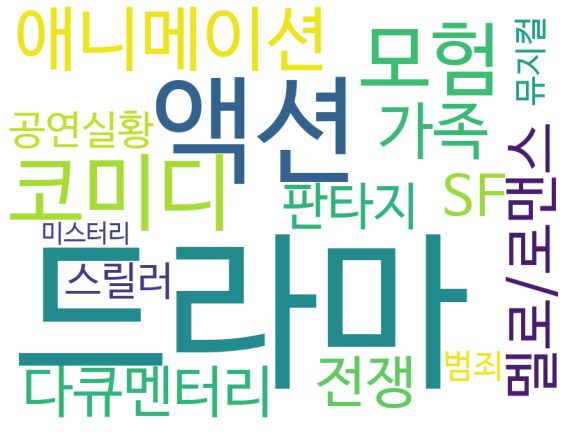

In [36]:
wordcloud = WordCloud(font_path='NanumBarunGothic', background_color='white', width=800, height=600)
cloud = wordcloud.generate_from_frequencies(dict(tags))
# print(cloud)
plt.figure(figsize=(10,8))
plt.axis('off')
plt.imshow(cloud)
plt.show()